In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Load the dataset
data_url = 'https://raw.githubusercontent.com/minknhom/dataset/main/FB.csv'
df = pd.read_csv(data_url)




In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2474,2022-03-18,206.699997,216.800003,206.000000,216.490005,216.490005,52055000
2475,2022-03-21,214.500000,214.710007,207.630005,211.490005,211.490005,30142300
2476,2022-03-22,211.369995,219.460007,210.179993,216.649994,216.649994,31998800
2477,2022-03-23,213.330002,216.800003,212.160004,213.460007,213.460007,23717300


In [ ]:
start_date =  pd.to_datetime('2010-01-01')
end_date =  pd.to_datetime('2022-12-31')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]



In [ ]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the dataset
train_size = int(len(df) * 0.7)
test_size = int(len(df) * 0.3)
# validate_size = len(df) - train_size - test_size

train_data = df[:train_size]['Close']
test_data = df[train_size:train_size+test_size]['Close']
# validate_data = df[train_size+test_size:]['Close']


In [ ]:
train_data

0        38.230000
1        34.029999
2        31.000000
3        32.000000
4        33.029999
           ...    
1730    175.720001
1731    174.929993
1732    177.580002
1733    177.820007
1734    177.509995
Name: Close, Length: 1735, dtype: float64

In [ ]:
test_data

1735    179.100006
1736    179.649994
1737    178.869995
1738    178.779999
1739    178.279999
           ...    
2473    207.839996
2474    216.490005
2475    211.490005
2476    216.649994
2477    213.460007
Name: Close, Length: 743, dtype: float64

In [ ]:
# Build the Holt-Winters model
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=5)
model_fit = model.fit()

# Predict for the test and validate sets
test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Calculate RMSE for test and validate sets
test_rmse = np.sqrt(mean_squared_error(test_data, test_predictions))


# Calculate the Mean Absolute Percentage Error (MAPE)
test_mape = np.mean(np.abs((test_data - test_predictions) / test_data) * 100)

# Mean Absolute Error (MAE)
test_mae = mean_absolute_error(test_data, test_predictions)

print("Test RMSE:", test_rmse)
print("Test MAPE:", test_mape)
print("Test MAE:", test_mae)

Test RMSE: 68.20781813601565
Test MAPE: 18.278102832369992
Test MAE: 53.0697704614712


In [ ]:
# Bonus 30 index
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+32, step=1)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(last_index+1, last_index+31)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
2479    237.321867
2480    237.331472
2481    237.414926
2482    237.402484
2483    237.593832
2484    237.723289
2485    237.732894
2486    237.816348
2487    237.803906
2488    237.995254
2489    238.124711
2490    238.134316
2491    238.217770
2492    238.205328
2493    238.396676
2494    238.526133
2495    238.535738
2496    238.619192
2497    238.606750
2498    238.798098
2499    238.927555
2500    238.937160
2501    239.020614
2502    239.008171
2503    239.199520
2504    239.328977
2505    239.338582
2506    239.422036
2507    239.409593
2508    239.600942
2509    239.730399
dtype: float64


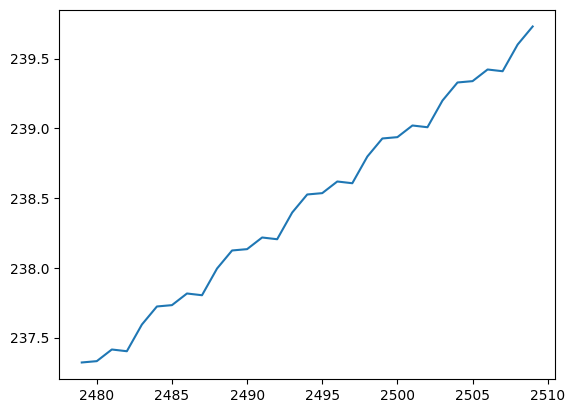

In [ ]:
plt.plot(last_data, y_next_30_days)

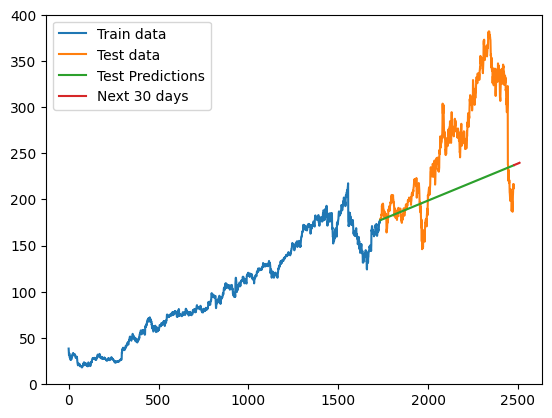

In [ ]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
# plt.plot(validate_data.index, validate_data)
plt.plot(test_data.index, test_predictions)
# plt.plot(validate_data.index, validate_predictions)
plt.plot(last_data, y_next_30_days)
plt.legend(['Train data', 'Test data', 'Test Predictions','Next 30 days'])
plt.show()